# Сессия 3

---

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")
pd.options.display.max_columns = 3000

Чтение из датафрейма

In [2]:
df = pd.read_csv("df.csv")

In [3]:
from sklearn.model_selection import train_test_split
X_train, y_train = train_test_split(df, test_size=0.65, random_state=42, stratify=df['reason.category.name'])

In [4]:
df = X_train

In [5]:
df.reset_index(drop=True, inplace=True)

In [6]:
df

,district_name,sidebar.id,payload.dt,sidebar.author_name,sidebar.latitude,sidebar.longitude,sidebar.full_address,sidebar.responsible.data.executor.organization_name,sidebar.responsible.data.executor.person_position,sidebar.responsible.data.executor.person_name,sidebar.responsible.data.executor.person_phone,sidebar.responsible.data.executor.person_email,sidebar.municipality.name,reason.name,reason.category.city_object.name,payload.body_answer,reason.category.name,appeal,clean_appeal,clean_sentence
0,Адмиралтейский,3100308,2020-12-28 11:36:41.194118,Павел Х.,59.928013,30.308225,Неизвестно,"СПб ГКУ ""Центр комплексного благоустройства""",Заместитель директора,Олехнович Виталий Павлович,242-36-01,olehnovich@guckb.spb.ru,муниципальный округ Сенной округ,"Лужи на проезжей части, тротуаре",Улица,Уважаемый пользователь!\n\nВ соответствии с Кл...,Благоустройство,лужа на пешеходном переходе,"['пешеходный', 'переход']",пешеходный переход
1,Кировский,3183624,2021-02-10 08:59:17.322348,Максим К.,59.860733,30.236146,"г.Санкт-Петербург, проспект Маршала Жукова, до...",СПб ГКУ ЖА Кировского района,Заместитель директора,Грибанова Мария Николаевна,(812) 576 14 99,guzhakir@gmail.com,муниципальный округ Красненькая речка,Хранение вещей на лестничной площадке,Дом,Уважаемый пользователь!\r\n\r\nВ ответ на Ваше...,Содержание МКД,"Маршала Жукова 22, 14 этаж.\n\nБольше 2-х неде...","['маршал', 'жуков', 'этажбольше', 'неделя', 'х...",маршал жуков этажбольше неделя храниться мебел...
2,Кировский,2982887,2020-11-26 10:23:46.738623,Андрей Г.,59.849512,30.253931,Неизвестно,Неизвестно,Неизвестно,Неизвестно,Неизвестно,Неизвестно,муниципальный округ Дачное,Лужи на твердом покрытии,Двор,Уважаемый пользователь!\r\n\r\nСкопление осадк...,Благоустройство,На пешеходной дорожке от угла дома 21к2 в стор...,"['пешеходный', 'дорожка', 'сторона', 'детский'...",пешеходный дорожка сторона детский площадка по...
3,Невский,3268824,2021-04-07 12:32:29.736374,Юлия Н.,59.888663,30.420071,"г.Санкт-Петербург, улица Седова, дом 35, литера А",Неизвестно,Неизвестно,Неизвестно,Неизвестно,Неизвестно,муниципальный округ Невская застава,Неудовлетворительное состояние парадной,Дом,Уважаемый пользователь!\r\n\r\nРассмотрев Ваше...,Содержание МКД,Год назад был произведен ремонт парадной. Уже ...,"['назад', 'произвести', 'ремонт', 'парадный', ...",назад произвести ремонт парадный стена около к...
4,Курортный,3115412,2021-01-07 17:06:20.127364,Шшш Ш.,60.113166,29.969470,Неизвестно,"СПб ГКУ ""Центр комплексного благоустройства""",Заместитель директора,Нарджиева Наталья Николаевна,242-36-01,portal_ckb@guckb.spb.ru,город Сестрорецк,Неубранный снег,Мост,Уважаемый пользователь!\r\n\r\nНа указанной в ...,Благоустройство,Не убран снег,['убрать'],убрать
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21303,Московский,3290309,2021-04-07 16:32:06.989784,Евгений К.,59.863719,30.326661,Неизвестно,Неизвестно,Неизвестно,Неизвестно,Неизвестно,Неизвестно,муниципальный округ Московская застава,Неудовлетворительное состояние асфальтового по...,Двор,Уважаемый пользователь!\r\n\r\nАварийность асф...,Благоустройство,Ямы на асфальтном покрытии.,"['асфальтный', 'покрытие']",асфальтный покрытие
21304,Центральный,3057695,2020-12-09 12:47:45.812630,Владислав Б.,59.919059,30.347434,"г.Санкт-Петербург, Боровая улица, дом 26-28, л...",Неизвестно,Неизвестно,Неизвестно,Неизвестно,Неизвестно,муниципальный округ Владимирский округ,Несанкционированные надписи / объявления на ст...,Дом,Уважаемый пользователь!\r\n\r\nРассмотрев Ваше...,Благоустройство,Прошу закрасить граффити.,"['просить', 'закрасить', 'граффити']",просить закрасить граффити
21305,Московский,3088031,2020-12-23 17:18:18.362936,Сергей Н.,59.866921,30.323337,Неизвестно,Неизвестно,Неизвестно,Неизвестно,Неизвестно,Неизвестно,муниципальный округ Московская застава,"Неудовлетворительное состояние колодца, люка",Территория Санкт-Петербурга,Адрес: территория Московского парка Победы (ЗН...,Повреждения или неисправность элементов ул

При экспорте 1 из атрибутов стал object вместо list

In [7]:
#Конвертация object в list
df["clean_appeal"] = df["clean_appeal"].apply(lambda x: x.replace("'", "").strip('][').split(', '))

In [8]:
df['payload.dt']=pd.to_datetime(df['payload.dt'])

In [9]:
df = df.dropna(axis='index', how='any', subset=['clean_sentence'])

#### Для дальнейшей визуализации зависемостей мне нужно получить список самых популярных слов для каждой категории

Для того что бы было проще визуализировать данную зависимость сделаю отдельный фрейм данных

In [10]:
#Пучстой словарь в который будут загружаться категории и самые популярные слова к ним
full = {}

Самый простой  вариант наполнить словарь данными это через цикл, а в подщетах мне поможет библиотека collections (метод Counter)

In [11]:
from collections import Counter
#Цикл который будет пробегаться по каждой категории
for name in df['reason.category.name']:
    #Counter будет возвращать список кортежей (слово, его колимчество)
    #Во время прогона по категории в список будут добавляться все слова для одной категории
    ultratext = []
    #Далее цикл получает имя категории и проходится по столбцу со списками
    for i in df[df['reason.category.name'] == name]['clean_appeal']:
        #вложеный цикл в свою очередь проходится по каждому слову из списка 
        #и добавляет его в большой список со всеми словами категории
        for j in i:
            ultratext.append(j)
    #в конце создается новый элемент словаря.
    #ключ это название категории, а значение это список в котором 10 самых популярных слов в категории
    full[name] = Counter(ultratext).most_common(10)

Созданеи фрейма данных из словаря

In [12]:
fdf = pd.DataFrame(full)

Элементы словаря представлены в виде кортежа, что является не удобным для визуализации <br>
так что будет правильным разложить его

In [13]:
for name in fdf.columns:
    #новые колонки будут иметь те же названия но с препиской word и count что говрит само за себя
    fdf[[name+'_word', name+'_count']] = pd.DataFrame(fdf[name].tolist(), index=fdf.index)
    #оставшиеся колонки можно стереть так как они больше не нужны
    fdf.drop(columns=name, inplace=True)

Результат

In [14]:
fdf

,Благоустройство_word,Благоустройство_count,Содержание МКД_word,Содержание МКД_count,Незаконная информационная и (или) рекламная конструкция_word,Незаконная информационная и (или) рекламная конструкция_count,Санитарное состояние_word,Санитарное состояние_count,Нарушение правил пользования общим имуществом_word,Нарушение правил пользования общим имуществом_count,Фасад_word,Фасад_count,Повреждения или неисправность элементов уличной инфраструктуры_word,Повреждения или неисправность элементов уличной инфраструктуры_count,Кровля_word,Кровля_count,Водоснабжение_word,Водоснабжение_count,Центральное отопление_word,Центральное отопление_count,Нарушение порядка пользования общим имуществом_word,Нарушение порядка пользования общим имуществом_count,Водоотведение_word,Водоотведение_count,Подвалы_word,Подвалы_count,Состояние рекламных или информационных конструкций_word,Состояние рекламных или информационных конструкций_count,"Незаконная реализация товаров с торгового оборудования (прилавок, ящик, с земли)_word","Незаконная реализация товаров с торгового оборудования (прилавок, ящик, с земли)_count"
0,мусор,2327,парадный,2253,рекламный,391,парадный,92,фасад,471,фасад,236,покрытие,96,труба,118,горячий,195,отопление,77,парадный,59,подвал,95,подвал,77,рекламный,102,торговля,127
1,убрать,1439,дверь,1449,конструкция,331,подъезд,67,незаконный,313,стена,109,колодец,83,крыша,93,холодный,149,парадный,55,реклама,42,запах,91,открыть,41,надпись,86,незаконный,58
2,надпись,1274,уборка,1334,незаконный,237,таракан,55,решётка,313,ремонт,64,крышка,60,водосточный,90,проблема,117,батарея,55,общий,36,канализация,78,продух,36,объявление,79,несанкционированный,28
3,газон,1010,подъезд,1306,реклама,220,подвал,50,кондиционер,157,состояние,54,состояние,60,кровля,70,квартира,107,температура,48,собственник,33,труба,58,замок,31,конструкция,74,место,24
4,просить,956,лестница,744,вывеска,213,крыса,50,установить,94,окраска,51,возле,51,ремонт,39,труба,104,радиатор,46,рекламный,30,проблема,47,дверь,28,стенд,47,товар,23
5,дорога,812,стена,695,проверить,207,мусоропровод,41,самовольно,87,просить,49,вокруг,44,повредить,38,напор,94,лестничный,33,имущество,25,парадный,45,подвальный,23,тысяча,42,реализация,18
6,объявление,755,просить,576,законность,181,запах,28,демонтировать,85,здание,45,асфальт,42,парадный,37,стояк,74,подъезд,32,убрать,24,подъезд,44,подъезд,21,несанкционированный,34,метро,15
7,очистить,718,мусор,574,демонтировать,166,просить,28,размещение,81,краска,44,неудовлетворительный,42,сосулька,33,подвал,71,квартира,30,подъезд,24,квартира,40,парадный,18,реклама,34,предназначить,14
8,тротуар,690,первый,537,просить,150,требоваться,28,рештка,76,улица,44,просадка,42,протечка,31,заявка,51,площадка,21,помещение,21,просить,25,закрыть,15,очистить,29,торговать,12
9,территория,683,состояние,512,размещение,146,дезинфекция,27,помещение,67,окрасить,43,провал,41,проблема,30,просить,51,отсутствовать,20,дверь,20,канализационный,23,постановление,13,рисунок,23,администрация,11


### 3.1. Визуализация зависимостей

Зависимость категории обращения от ключевыех слов

In [15]:
def barplot(x_data, y_data, x_label="", y_label="", title=""):
    _, ax = plt.subplots()
    # Draw bars, position them in the center of the tick mark on the x-axis
    ax.bar(x_data, y_data, color = '#539caf', align = 'center')
    # Draw error bars to show standard deviation, set ls to 'none'
    # to remove line between points
    ax.errorbar(x_data, y_data, color = '#297083', ls = 'none', lw = 2, capthick = 2)
    plt.xticks(rotation=90)
    ax.set_ylabel(y_label)
    ax.set_xlabel(x_label)
    ax.set_title(title)

Сделаю вывод в цикле что бы было быстрее

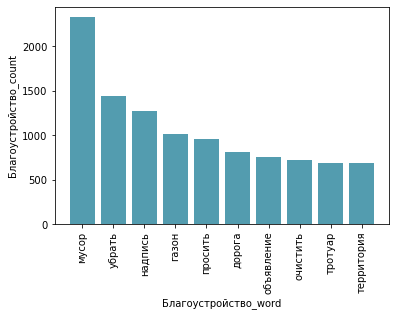

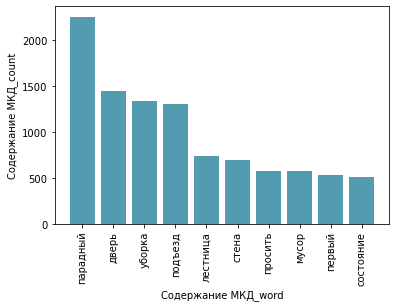

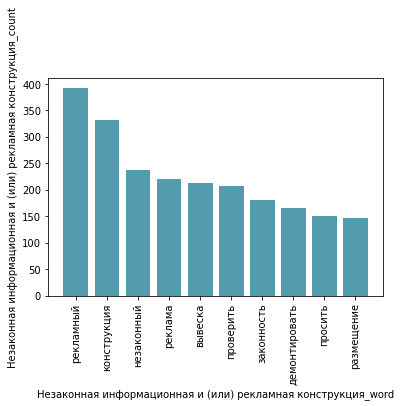

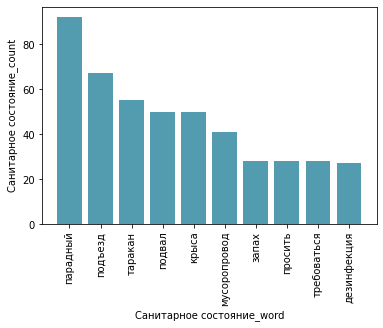

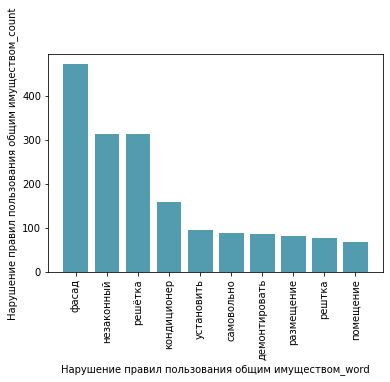

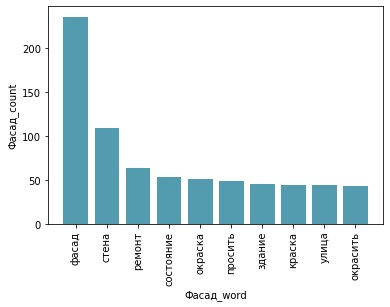

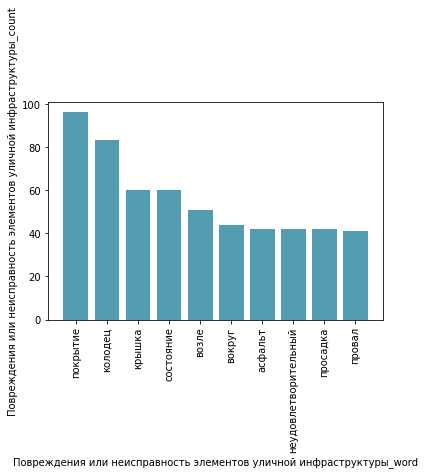

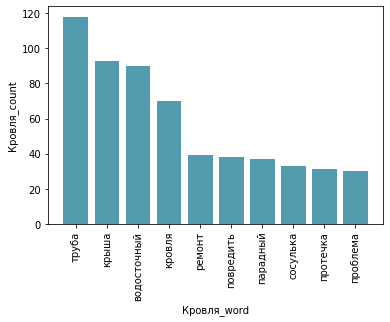

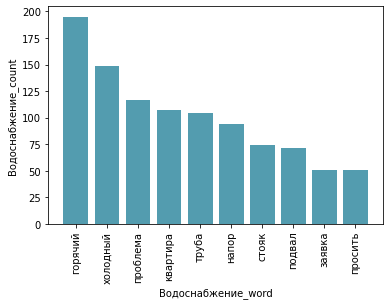

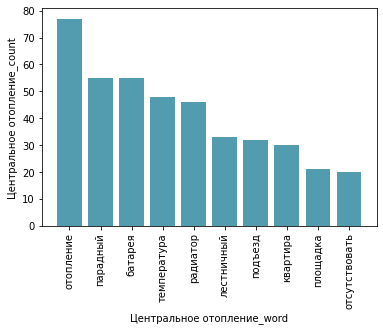

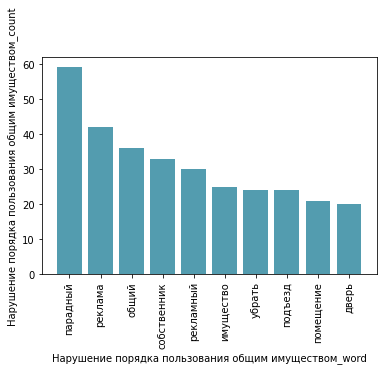

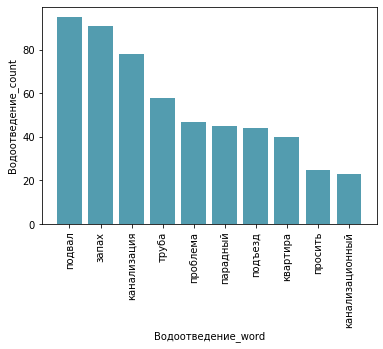

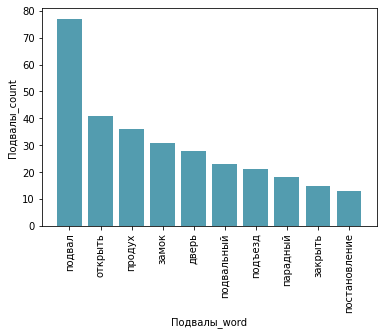

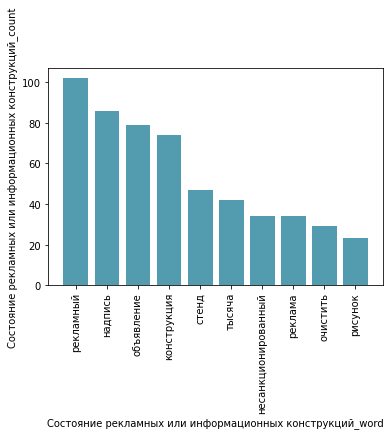

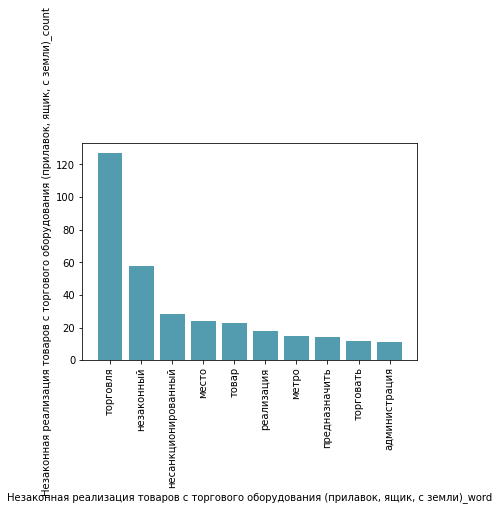

In [16]:
for i in range(0, len(fdf.columns)-1, 2):
    barplot(fdf[fdf.columns[i]], fdf[fdf.columns[i+1]], fdf.columns[i], fdf.columns[i+1])

На графиках выше можно увидеть, что самоые популярные слова напрямую отражают категорию жалобы, что очень хорошо

Теперь отображу зависимости категории обращения и даты обращения

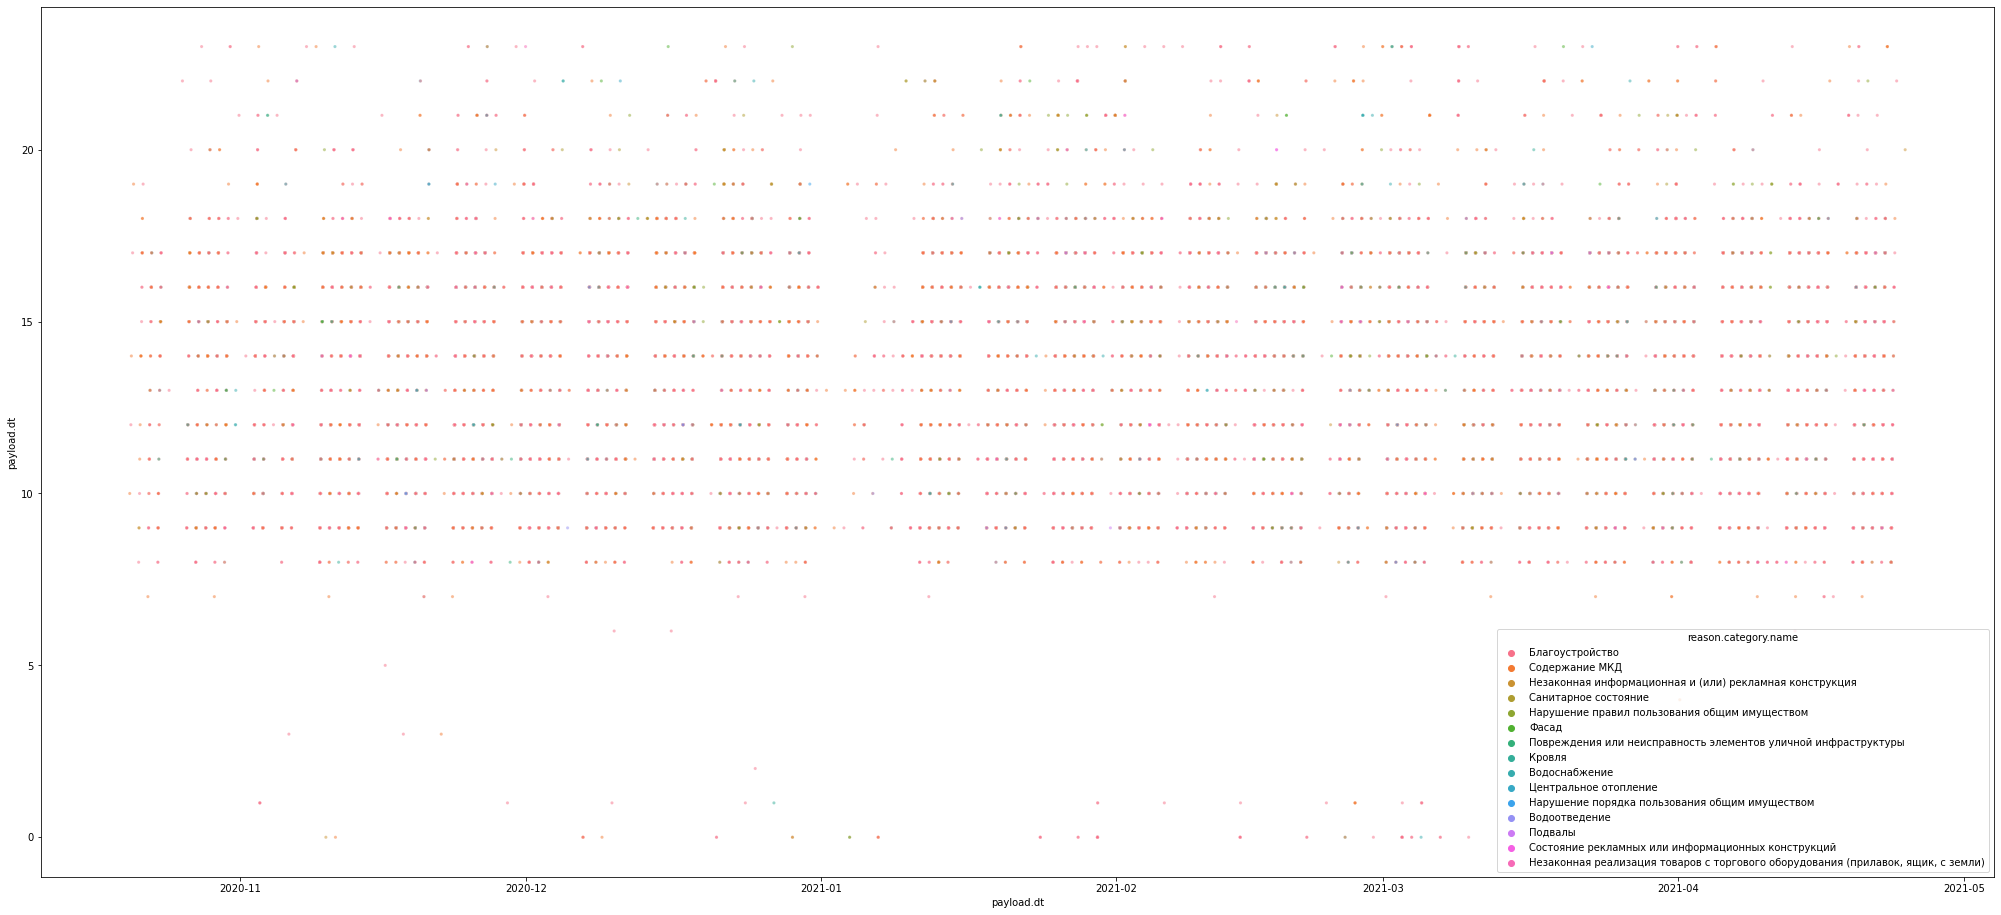

In [17]:
plt.figure(figsize=(35, 16))
sns.scatterplot(x=df['payload.dt'], y=df["payload.dt"].dt.hour, hue=df['reason.category.name'],alpha=0.5, s=10);

На  диаграмме рассеивания видно что самые активные часы для жалоб это с 9 утра до 20 вечера

Теперь хочу посмотреть усреднённые количество обращений по дням недели

In [18]:
#мне понадобится новый столбец что бы вывести день недели
df['dayofweek'] = df["payload.dt"].dt.day_name()

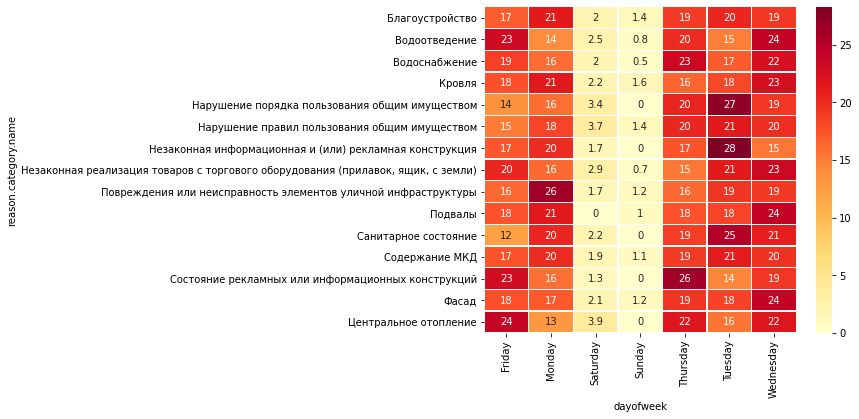

In [19]:
pt = pd.pivot_table(df, index='reason.category.name', columns='dayofweek', values='payload.dt', aggfunc='count')
#получение процентного соотношения
pt = pt.apply(lambda x: round(x / x.sum() * 100,1), axis=1)
#замена всех нанов на 0
pt = pt.fillna(0)
#Размер графика
plt.figure(figsize=(7, 6))
#Отображение
sns.heatmap(pt, annot=True, linewidths=0.4, cmap="YlOrRd");

### 3.2. Векторизация текстов

#### CountVectorizer

CountVectorizer преобразовывает входной текст в матрицу, значениями которой, являются количества вхождения данного ключа(слова) в текст. В отличие от FeatureHasher имеет больше настраиваемых параметров(например можно задать токенизатор), но работает медленнее.

In [20]:
from sklearn.feature_extraction.text import CountVectorizer
#Обьявдление векторизатора
cvec = CountVectorizer()
X1 = cvec.fit_transform(df['clean_sentence'])

In [21]:
cvec.get_feature_names()[:10]

['абажур',
 'абонентский',
 'абразив',
 'абрамов',
 'абсолютно',
 'абсолютный',
 'абсурдно',
 'авангард',
 'авангарднойдлить',
 'авангардный']

#### HashingVectorizer

HashingVectorizer является смесью CountVectorizer и FeatureHasher . В нем можно и регулировать размер закодированной строки (как в FeatureHasher) и настраивать токенизатор (как в CountVectorizer). К тому же его производительность ближе к FeatureHasher.

In [22]:
from sklearn.feature_extraction.text import HashingVectorizer
#Обьявдление векторизатора с параметром n_features=2**10
hashvec = HashingVectorizer(n_features=2**10)
X2 = hashvec.fit_transform(df)

In [23]:
X2.shape

(21, 1024)

In [24]:
df.shape

(21220, 21)

#### TfidfVectorizer

TF-IDF (от англ. TF — term frequency, IDF — inverse document frequency) — статистическая мера, используемая для оценки важности слова в контексте документа, являющегося частью коллекции документов или корпуса.

In [25]:
from sklearn.feature_extraction.text import TfidfVectorizer
#Обьявдление векторизатора
tfidf = TfidfVectorizer()
X3 = tfidf.fit_transform(df['clean_sentence'])

In [26]:
tfidf.get_feature_names()[3:13]

['абрамов',
 'абсолютно',
 'абсолютный',
 'абсурдно',
 'авангард',
 'авангарднойдлить',
 'авангардный',
 'авариионо',
 'авариитребоваться',
 'аварийка']

### 3.3. Тематическое моделирование

Иморт модулей

In [27]:
import gensim
from gensim.corpora.dictionary import Dictionary
from gensim.models.ldamodel import LdaModel
from gensim import corpora
from gensim.models import LsiModel

функция для визуализации

### LDA

Latent Dirichlet Allocation (LDA) — популярный алгоритм моделирования тем реализованные в том числе в пакете Gensim. ... Основная задача алгоритмов ТМ, заключается в том что бы полученные темы были хорошего качество, понятными, самозначимыми и разделенными.

In [28]:
#подготовка текста
common_texts = df["clean_appeal"]
dictionary = gensim.corpora.Dictionary(common_texts)
bow_corpus = [dictionary.doc2bow(doc) for doc in common_texts]

In [29]:
#созданеи и обучение модели
lda_model = LdaModel(
    bow_corpus, 
    num_topics = 5, 
    id2word = dictionary,                                    
    passes = 10,)

Выведем найденные топики и их клчюевые слова:

In [30]:
for index, topic in lda_model.show_topics(formatted=False, num_words= 30):
    print('Topic: {} \nWords: {}'.format(index, [w[0] for w in topic]))

Topic: 0 
Words: ['надпись', 'реклама', 'несанкционированный', 'фасад', 'стена', 'объявление', 'тысяча', 'фотофиксация', 'рекламный', 'оставлять', 'санктпетербург', 'административный', 'горячий', 'холодный', 'незаконный', 'закон', 'столб', 'здание', 'администрация', 'дорожный', 'очистить', 'рубль', 'удалить', 'район', 'просить', 'стенд', 'кондиционер', 'установленный', 'сооружение', 'статья']
Topic: 1 
Words: ['парадный', 'подъезд', 'состояние', 'работа', 'стена', 'проблема', 'ремонт', 'лестница', 'первый', 'адрес', 'квартира', 'произвести', 'требоваться', 'просить', 'просьба', 'который', 'далее', 'ответ', 'прилагаться', 'подвал', 'отсутствовать', 'неудовлетворительный', 'работать', 'сделать', 'покрытие', 'привести', 'заявка', 'устранить', 'время', 'второй']
Topic: 2 
Words: ['мусор', 'уборка', 'убрать', 'площадка', 'газон', 'дорога', 'территория', 'тротуар', 'грязь', 'подъезд', 'просить', 'график', 'детский', 'песок', 'часть', 'улица', 'убираться', 'парадный', 'убирать', 'лестничный',

### NMF

Неотрицательная матричная факторизация - хороший неконтролируемый метод интеллектуального анализа данных для обнаружения базовых отношений между текстами. 

In [31]:
from sklearn.decomposition import NMF
vectorizer = TfidfVectorizer(max_features=1500, min_df=10)
X = vectorizer.fit_transform(df["clean_sentence"])
#получение списка векторизированых слов
words = np.array(vectorizer.get_feature_names())

In [32]:
#созданеи и обучение модели
nmf = NMF(n_components=10, solver="mu", init="nndsvda")
W = nmf.fit_transform(X)
H = nmf.components_

Выведем найденные топики и их клчюевые слова:

In [33]:
for i, topic in enumerate(H):
     print("Topic {}: {}".format(i + 1, ",".join([str(x) for x in words[topic.argsort()[-10:]]])))

Topic 1: вдоль,детский,листва,песок,бытовой,покрышка,площадка,территория,газон,мусор
Topic 2: забор,спасибо,фасад,сооружение,стереть,дверь,фотофиксация,несанкционированный,стена,надпись
Topic 3: песок,пешеходный,прилегать,отремонтировать,автомобильный,грязь,вдоль,тротуар,неубранный,дорога
Topic 4: самоклей,тротуар,опора,просьба,оставлять,бумага,дорожный,просить,необходимо,очистить
Topic 5: часть,песок,нужно,покрышка,необходимо,тротуар,листва,просьба,просить,убрать
Topic 6: прилагаться,оставлять,произвести,очистка,бумажный,рекламный,дорожный,освещение,несанкционированный,объявление
Topic 7: удалить,сторона,забор,просьба,фасад,здание,стена,просить,закрасить,граффити
Topic 8: стоить,бумага,стенд,наркотик,незаконный,стена,дорожный,столб,висеть,реклама
Topic 9: состояние,отсутствовать,первый,лестница,работать,освещение,уборка,подъезд,дверь,парадный
Topic 10: размещение,здание,кондиционер,вывеска,демонтировать,конструкция,рекламный,решётка,фасад,незаконный


### LSA

 LsiModel для уменьшения размера

In [34]:
common_texts = df["clean_appeal"]
dictionary = corpora.Dictionary(common_texts)
doc_term_matrix = [dictionary.doc2bow(doc) for doc in common_texts]

In [35]:
number_of_topics=7
words=10
#созданеи и обучение модели
lsamodel = LsiModel(doc_term_matrix, num_topics=number_of_topics, id2word = dictionary)

Выведем найденные топики и их клчюевые слова:

In [36]:
for index, topic in lsamodel.show_topics(formatted=False, num_words= 30):
    print('Topic: {} \nWords: {}'.format(index, [w[0] for w in topic]))

Topic: 0 
Words: ['парадный', 'уборка', 'дверь', 'мусор', 'подъезд', 'просить', 'стена', 'убрать', 'состояние', 'работа', 'площадка', 'лестница', 'ремонт', 'который', 'проблема', 'первый', 'график', 'фасад', 'адрес', 'лестничный', 'территория', 'отсутствовать', 'часть', 'квартира', 'просьба', 'грязь', 'надпись', 'требоваться', 'далее', 'газон']
Topic: 1 
Words: ['тысяча', 'санктпетербург', 'административный', 'закон', 'рубль', 'надпись', 'объявление', 'парадный', 'уборка', 'фасад', 'несанкционированный', 'установка', 'мусор', 'место', 'администрация', 'самовольный', 'законность', 'район', 'правонарушение', 'статья', 'ответственность', 'должностной', 'комитет', 'смотреть', 'безопасность', 'установленный', 'рисунок', 'действие', 'вопрос', 'штраф']
Topic: 2 
Words: ['мусор', 'дверь', 'парадный', 'уборка', 'убрать', 'газон', 'территория', 'площадка', 'входной', 'стена', 'доводчик', 'тротуар', 'график', 'грязь', 'закрываться', 'работать', 'детский', 'дорога', 'производиться', 'песок', 'сост

### 3.4. Кластеризация текстов

Базовая обработка Tfidf которая позволит немного уменьшить обьем сета

In [37]:
from sklearn.feature_extraction.text import TfidfVectorizer
#Обьявдление векторизатора
tfidf = TfidfVectorizer()
X2 = tfidf.fit_transform(df['clean_sentence'])

In [38]:
import numpy as np
from sklearn.decomposition import PCA

РСА же сожмет этот сет в массив из чисел

In [39]:
pca = PCA(n_components=2, random_state=0)
X = pca.fit_transform(X2.toarray())

Функция для визуализации кластеров

In [40]:
def viz(X, prediction):
    plt.figure(figsize=(12, 12))
    
    plt.subplot(224)
    plt.scatter(X[:, 0], X[:, 1], c=prediction)
    plt.title("Unevenly Sized Blobs")
    
    plt.show()

### Сравню работу 3х алгоитмов и выберу лучший

### KMeans

Первый взял KMeans так как он редко показывает плохой результат и быстро дает ответ

Я возьму 2 модели одного алгоритма с разными гиперпарамеирами (настройка гиперпараметров)

In [41]:
from sklearn.cluster import KMeans
#Задал гиперпараметры 
kmodel = KMeans(n_clusters = 7, max_iter=200,init='k-means++', random_state=69)
kmodel2 = KMeans(n_clusters = 6, max_iter=400, init='k-means++', random_state=69)
#кластеризация
kmodel.fit(X)
kmodel2.fit(X)

#метки
klabels = kmodel.labels_
klabels2 = kmodel2.labels_

Оценка качества кластеризации при помощи метрики silhouette_score

In [42]:
from sklearn import metrics
#Обьявление silhouette_score
silhouette_score = metrics.silhouette_score(X, klabels, metric='euclidean')
silhouette_score

0.7248881705854209

In [43]:
from sklearn import metrics
#Обьявление silhouette_score
silhouette_score = metrics.silhouette_score(X, klabels2, metric='euclidean')
silhouette_score

0.75405315766158

По результатам метрики модель с 4мя кластерами показала лучший резуьтаь

Для визуализации добавил метки кластеров в датафрейм

In [44]:
# Giving Labels/assigning a cluster to each point/text 
df['KMeans Clus Label'] = klabels2 # the last column you can see the label numebers

визуализация работы KMeans

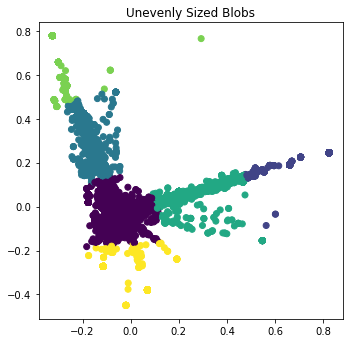

In [45]:
viz(X, klabels2)

На графике видно что распределение ровномерное и довольно четкое, разве что 1 класер в небольшом количестве, но он выделяется сильнее остальных

### MiniBatchKMeans

Далее взял MiniBatchKMeans так как он является упрощенной версией KMeans и интересно как он справится с задачей

Я возьму 2 модели одного алгоритма с разными гиперпарамеирами (настройка гиперпараметров)

In [46]:
from sklearn.cluster import MiniBatchKMeans
#Задал гиперпараметры
kbmeans = MiniBatchKMeans(n_clusters=7, max_iter=400,random_state=1024, batch_size=4096)
kbmeans.fit(X)

#Задал гиперпараметры
kbmeans2 = MiniBatchKMeans(n_clusters=5, max_iter=700, random_state=1024, batch_size=4096)
kbmeans2.fit(X)

#Метки
kblabels = kbmeans.labels_
kblabels2 = kbmeans2.labels_

Оценка качества кластеризации при помощи метрики silhouette_score

In [47]:
from sklearn import metrics
#Обьявление silhouette_score
silhouette_score = metrics.silhouette_score(X, kblabels, metric='euclidean')
silhouette_score
#Метрика показала, что MiniBatchKMeans справился хуже

0.7210858052197789

In [48]:
from sklearn import metrics
#Обьявление silhouette_score
silhouette_score = metrics.silhouette_score(X, kblabels2, metric='euclidean')
silhouette_score
#Метрика показала, что MiniBatchKMeans справился не на много хуже

0.7312243600944291

Для визуализации добавил метки кластеров в датафрейм

In [49]:
# Giving Labels/assigning a cluster to each point/text 
df['Minibatch Clus Label'] = kbmeans.labels_ # the last column you can see the label numebers

визуализация работы MiniBatchKMeans

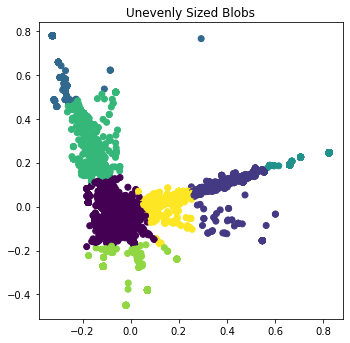

In [50]:
viz(X, kblabels)

Распределение на графике показало перегуженность 1 кластера и малое количество других кластеров - плохой результат

### OPTICS

На последок оставил SpectralClustering, он подходит для работы с небольшин количеством кластеров и средним количеством семплов

Я возьму 2 модели одного алгоритма с разными гиперпарамеирами (настройка гиперпараметров)

In [51]:
from sklearn.cluster import OPTICS
#Задал гиперпараметры
clust = OPTICS(min_samples=2, p=2)
clust.fit(X)

#Задал гиперпараметры
clust2 = OPTICS(min_samples=3, p=3)
clust2.fit(X)

#Присвоил метки в переменную cllabels
cllabels = clust.labels_
cllabels2 = clust2.labels_

Оценка качества кластеризации при помощи метрики silhouette_score

In [52]:
from sklearn import metrics
#Обьявление silhouette_score
silhouette_score = metrics.silhouette_score(X, cllabels, metric='euclidean')
silhouette_score
#результаты метрики намного хуже чем у MiniBatchKMeans и KMeans

0.5036802550394281

In [53]:
from sklearn import metrics
#Обьявление silhouette_score
silhouette_score = metrics.silhouette_score(X, cllabels2, metric='euclidean')
silhouette_score
#результаты метрики хуже чем у MiniBatchKMeans и KMeans

0.33702314052960636

Для визуализации добавил метки кластеров в датафрейм

In [54]:
# Giving Labels/assigning a cluster to each point/text 
df['Spectr Clus Label'] = clust.labels_ # the last column you can see the label numebers

визуализация работы SpectralClustering

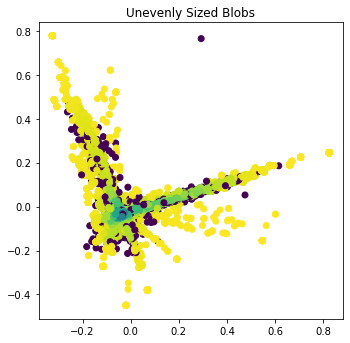

In [55]:
viz(X, cllabels)

Ситуация здесь по лучше, но все еще сильное преобладание одного кластера

#### По результам метрик и визуализаций я решил остановить свой выбор на KMeans

In [56]:
#Удалил метки предыдущих алгоритмов так как они не нужны
df.drop(columns=["Minibatch Clus Label", "Spectr Clus Label"], axis=1, inplace=True)

Теперь выведу топовые значения каждого кластера

In [57]:
print("Top terms per cluster:")
kmodel2.fit(X2)
order_centroids = kmodel2.cluster_centers_.argsort()[:, ::-1]
terms = tfidf.get_feature_names()[3:]
for i in range(6):
    print("Cluster %d:" % i, end='')
    for ind in order_centroids[i, :10]:
        print(' %s' % terms[ind], end='')
        print()

Top terms per cluster:
Cluster 0: мусорадворник
 дорогедворовый
 убратьпеский
 газонанеобходить
 просмотреть
 листвеприлагать
 территоррий
 покупать
 площадкахвечный
 тротуаратребовать
Cluster 1: параднымспасибо
 подъездаобновление
 уборкалежать
 дверькогда
 фасаданеобходить
 просмотреть
 освещениеть
 незакреплённый
 работеспасибо
 убратьпеский
Cluster 2: надписьрисунка
 стенахмер
 несвоевременно
 стилистика
 фасаданеобходить
 дверькогда
 фотофикция
 спасопреображенский
 просью
 соостветствовать
Cluster 3: граффитилучш
 закрасье
 просмотреть
 стенахмер
 фасаданеобходить
 зданиянаходиться
 просью
 убратьпеский
 гарантийный
 объяснительный
Cluster 4: объяснительный
 несвоевременно
 освещениеть
 рекламупросить
 досконально
 очищать
 бурмисова
 производилвасить
 остаковка
 качпть
Cluster 5: очиститься
 рекламапросьба
 незакреплённый
 витебский
 столбтак
 досконально
 бумагис
 просмотреть
 остаковка
 стенев


In [58]:
df["Clusters_name"] = df['KMeans Clus Label']

Напишу названия кластеров на основе слов из блока выше

In [59]:
df["Clusters_name"] = df["Clusters_name"].replace(0, "Назкаонные постройки")
df["Clusters_name"] = df["Clusters_name"].replace(1, "Жилищный вопрос")
df["Clusters_name"] = df["Clusters_name"].replace(2, "Правонарушения")
df["Clusters_name"] = df["Clusters_name"].replace(3, "Вандализм")
df["Clusters_name"] = df["Clusters_name"].replace(4, "Районный вопрос")
df["Clusters_name"] = df["Clusters_name"].replace(5, "Квартирный вопрос")

### 3.5. Подготовка отчета

#### В ходе работы было выполнено:
* 3.1. Визуализация зависимостей - Была выполнена визуализация категории обращения и ключевые слова, категории обращения и даты обращения, а также усреднённые количество обращений по дням недели
* 3.2. Векторизация текстов - Была проведена операция векторизации для текстов обращений граждан несколькими способами (CountVectorizer HashingVectorizer TfidfVectorizer)
* 3.3. Тематическое моделирование - Было проведено тематическое моделирование 3мя способами (LDA NMF LSA)
* 3.4. Кластеризация текстов - Текст был кластеризирован 3мя алгоритмами (KMeans MiniBatchKMeans SpectralClustering) и по итогу визуализации, а так же результатам метрик был выбран KMeans

In [60]:
df.to_csv("ndata.csv", index=False, encoding="utf-8-sig")

In [61]:
df

,district_name,sidebar.id,payload.dt,sidebar.author_name,sidebar.latitude,sidebar.longitude,sidebar.full_address,sidebar.responsible.data.executor.organization_name,sidebar.responsible.data.executor.person_position,sidebar.responsible.data.executor.person_name,sidebar.responsible.data.executor.person_phone,sidebar.responsible.data.executor.person_email,sidebar.municipality.name,reason.name,reason.category.city_object.name,payload.body_answer,reason.category.name,appeal,clean_appeal,clean_sentence,dayofweek,KMeans Clus Label,Clusters_name
0,Адмиралтейский,3100308,2020-12-28 11:36:41.194118,Павел Х.,59.928013,30.308225,Неизвестно,"СПб ГКУ ""Центр комплексного благоустройства""",Заместитель директора,Олехнович Виталий Павлович,242-36-01,olehnovich@guckb.spb.ru,муниципальный округ Сенной округ,"Лужи на проезжей части, тротуаре",Улица,Уважаемый пользователь!\n\nВ соответствии с Кл...,Благоустройство,лужа на пешеходном переходе,"[пешеходный, переход]",пешеходный переход,Monday,0,Назкаонные постройки
1,Кировский,3183624,2021-02-10 08:59:17.322348,Максим К.,59.860733,30.236146,"г.Санкт-Петербург, проспект Маршала Жукова, до...",СПб ГКУ ЖА Кировского района,Заместитель директора,Грибанова Мария Николаевна,(812) 576 14 99,guzhakir@gmail.com,муниципальный округ Красненькая речка,Хранение вещей на лестничной площадке,Дом,Уважаемый пользователь!\r\n\r\nВ ответ на Ваше...,Содержание МКД,"Маршала Жукова 22, 14 этаж.\n\nБольше 2-х неде...","[маршал, жуков, этажбольше, неделя, храниться,...",маршал жуков этажбольше неделя храниться мебел...,Wednesday,0,Назкаонные постройки
2,Кировский,2982887,2020-11-26 10:23:46.738623,Андрей Г.,59.849512,30.253931,Неизвестно,Неизвестно,Неизвестно,Неизвестно,Неизвестно,Неизвестно,муниципальный округ Дачное,Лужи на твердом покрытии,Двор,Уважаемый пользователь!\r\n\r\nСкопление осадк...,Благоустройство,На пешеходной дорожке от угла дома 21к2 в стор...,"[пешеходный, дорожка, сторона, детский, площад...",пешеходный дорожка сторона детский площадка по...,Thursday,0,Назкаонные постройки
3,Невский,3268824,2021-04-07 12:32:29.736374,Юлия Н.,59.888663,30.420071,"г.Санкт-Петербург, улица Седова, дом 35, литера А",Неизвестно,Неизвестно,Неизвестно,Неизвестно,Неизвестно,муниципальный округ Невская застава,Неудовлетворительное состояние парадной,Дом,Уважаемый пользователь!\r\n\r\nРассмотрев Ваше...,Содержание МКД,Год назад был произведен ремонт парадной. Уже ...,"[назад, произвести, ремонт, парадный, стена, о...",назад произвести ремонт парадный стена около к...,Wednesday,0,Назкаонные постройки
4,Курортный,3115412,2021-01-07 17:06:20.127364,Шшш Ш.,60.113166,29.969470,Неизвестно,"СПб ГКУ ""Центр комплексного благоустройства""",Заместитель директора,Нарджиева Наталья Николаевна,242-36-01,portal_ckb@guckb.spb.ru,город Сестрорецк,Неубранный снег,Мост,Уважаемый пользователь!\r\n\r\nНа указанной в ...,Благоустройство,Не убран снег,[убрать],убрать,Thursday,3,Вандализм
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21303,Московский,3290309,2021-04-07 16:32:06.989784,Евгений К.,59.863719,30.326661,Неизвестно,Неизвестно,Неизвестно,Неизвестно,Неизвестно,Неизвестно,муниципальный округ Московская застава,Неудовлетворительное состояние асфальтового по...,Двор,Уважаемый пользователь!\r\n\r\nАварийность асф...,Благоустройство,Ямы на асфальтном покрытии.,"[асфальтный, покрытие]",асфальтный покрытие,Wednesday,0,Назкаонные постройки
21304,Центральный,3057695,2020-12-09 12:47:45.812630,Владислав Б.,59.919059,30.347434,"г.Санкт-Петербург, Боровая улица, дом 26-28, л...",Неизвестно,Неизвестно,Неизвестно,Неизвестно,Неизвестно,муниципальный округ Владимирский округ,Несанкционированные надписи / объявления на ст...,Дом,Уважаемый пользователь!\r\n\r\nРассмотрев Ваше...,Благоустройство,Прошу закрасить граффити.,"[просить, закрасить, граффити]",просить закрасить граффити,Wednesday,0,Назкаонные постройки
21305,Московский,3088031,2020-12-23 17:18:18.362936,Сергей Н.,59.866921,30.323337,Неизвестно,Неизвест